# Beginner Tutorials - 1. ML basics
1. Overview
- Classify images
- Classify text
- Classify structured data
- Regression
- Overfitting and Underfitting
- Save and Restore Models

# 1. Overview
## 머신러닝의 기본 원리와 개념을 배우기 위한 머신러닝 단기집중과정
https://developers.google.com/machine-learning/crash-course/?hl=ko

# 2. Classify Images
https://www.tensorflow.org/alpha/tutorials/keras/basic_classification

- 패션 MNIST 데이터셋 임포트하기
- 데이터 탐색
- 데이터 전처리
- 모델 구성
 - 층 설정
 - 모델 컴파일
- 모델 훈련
- 정확도 평가
- 예측 만들기

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.0.0-alpha0


In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [5]:
test_images.shape, test_labels.shape

((10000, 28, 28), (10000,))

In [6]:
train_images[0] #28x28 : 0~255 사이의 픽셀 값

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
train_labels[:10] # 0~9까지 10개의 숫자에 대한 Labeling

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [8]:
class_names=['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
             'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### 데이터 전처리 Data Preprocessing

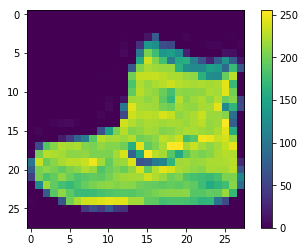

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [10]:
train_images = train_images / 255.
test_images = test_images / 255.

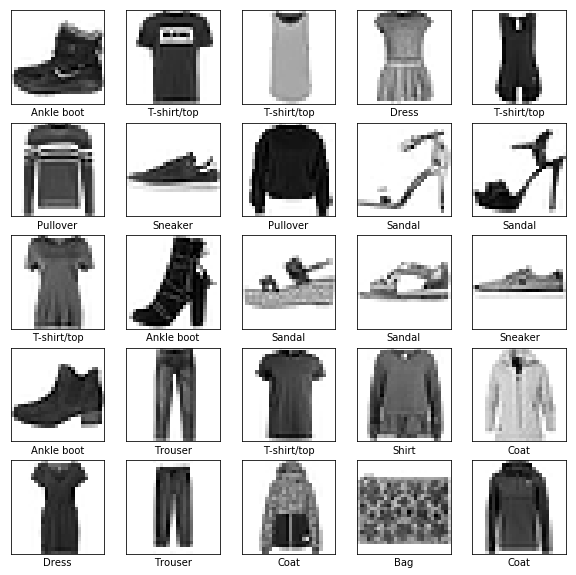

In [11]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()
    

### 모델 구성
- 층 설정
- 모델 컴파일

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [13]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['acc'])

### 모델 훈련

In [14]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
60000/60000 [==============================] - 2s 34us/sample - loss: 0.5035 - acc: 0.8217
Epoch 2/5
60000/60000 [==============================] - 2s 28us/sample - loss: 0.3720 - acc: 0.8655
Epoch 3/5
60000/60000 [==============================] - 2s 29us/sample - loss: 0.3332 - acc: 0.8783
Epoch 4/5
60000/60000 [==============================] - 2s 39us/sample - loss: 0.3125 - acc: 0.8856
Epoch 5/5
60000/60000 [==============================] - 2s 32us/sample - loss: 0.2915 - acc: 0.8927


### 정확도 평가

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('\n테스트 정확도:', test_acc)

10000/10000 [==============================] - 0s 21us/sample - loss: 0.3659 - acc: 0.8686

테스트 정확도: 0.8686


### 예측 만들기

In [16]:
predictions = model.predict(test_images)
predictions[0]

array([1.6072132e-04, 1.1115181e-07, 1.2410890e-06, 1.3098789e-08,
       2.2564705e-06, 1.4044235e-02, 2.1613672e-05, 5.6039799e-02,
       1.4516492e-05, 9.2971545e-01], dtype=float32)

In [17]:
np.argmax(predictions[0])

9

In [18]:
test_labels[0]

9

In [19]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img, cmap=plt.cm.binary)
    
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color='blue'
    else:
        color='red'
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
                                        color=color)

In [20]:
def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

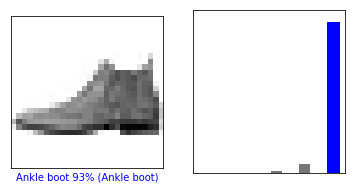

In [21]:
i=0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions, test_labels)
plt.show()

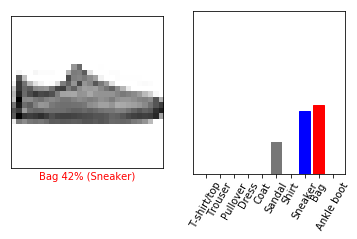

In [22]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)
_ = plt.xticks(range(10), class_names, rotation=60)
plt.show()

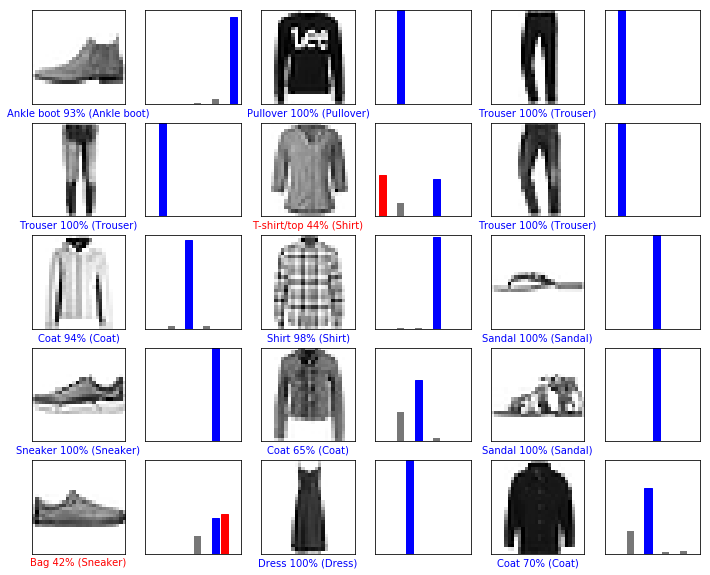

In [23]:
num_rows = 5
num_cols = 3
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i + 1)
    plot_image(i,predictions, test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i + 2)
    plot_value_array(i,predictions, test_labels)
plt.show()

In [24]:
img = test_images[0]
print(img.shape)

(28, 28)


In [25]:
img = (np.expand_dims(img, 0))
print(img.shape)

(1, 28, 28)


In [26]:
predictions_single = model.predict(img)
print(predictions_single)

[[1.60721320e-04 1.11151707e-07 1.24108783e-06 1.30987381e-08
  2.25645954e-06 1.40442159e-02 2.16136723e-05 5.60397990e-02
  1.45164495e-05 9.29715455e-01]]


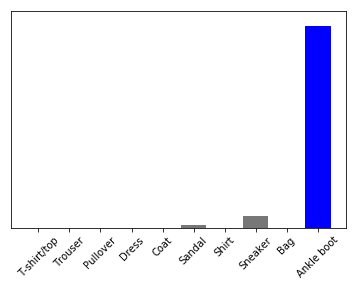

In [27]:
plot_value_array(0, predictions_single, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [28]:
np.argmax([predictions_single[0]])

9

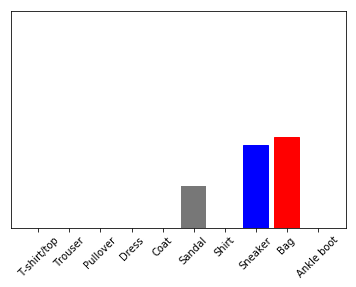

In [29]:
img = test_images[12]
img = (np.expand_dims(img, 0))
predictions_single = model.predict(img)
plot_value_array(12, predictions, test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)